## British Airways - Predicting Customers Behaviours


Build a predictive model to understand factors that influence buying behaviour

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [2]:
data_cust = pd.read_csv("data/customer_booking.csv", encoding='ISO-8859-1')

In [3]:
data_cust.head(3)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0


In [4]:
#copy the originall data
df_cust = data_cust.copy()

In [5]:
df_cust.head(3)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0


In [6]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

- num_passengers = nomor penumpang
- sales_channel = saluran penjualan
- trip_type = jenis jenis trip
- purchase_lead = prospek pembelian
- length_of_stay = jumlah hari untuk tinggal
- flight_hour = jumlah waktu yang dihabiskan pilot untuk terbang selama periode tertentu
- flight_day = hari penerbanagn dari tengah malam hingga tengah malam
- route =  rute
- booking_origin = tempat reservation booking dibuat
- wants_extra_baggage = yang mau bagasi ekstra
- wants_in_flight_meals = yang mau makanan penerbangan
- flight_duration = waktu yang dibutuhkan penerbangan dari keberangkatan ke kedatangan
- booking_complete = reservasi atau pemesanan yang sudah selesai yang sudah dikonfirmasi

In [28]:
df_cust.shape

(50000, 14)

In [29]:
#check the columns
df_cust.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

### Exploratory Data Analysis 

**var target = 'booking_complete'**

In [30]:
#see the summary of dataframe
df_cust.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [64]:
df_cust.isnull().any()

num_passengers           False
sales_channel            False
trip_type                False
purchase_lead            False
length_of_stay           False
flight_hour              False
flight_day               False
route                    False
booking_origin           False
wants_extra_baggage      False
wants_preferred_seat     False
wants_in_flight_meals    False
flight_duration          False
booking_complete         False
dtype: bool

#### flight duration

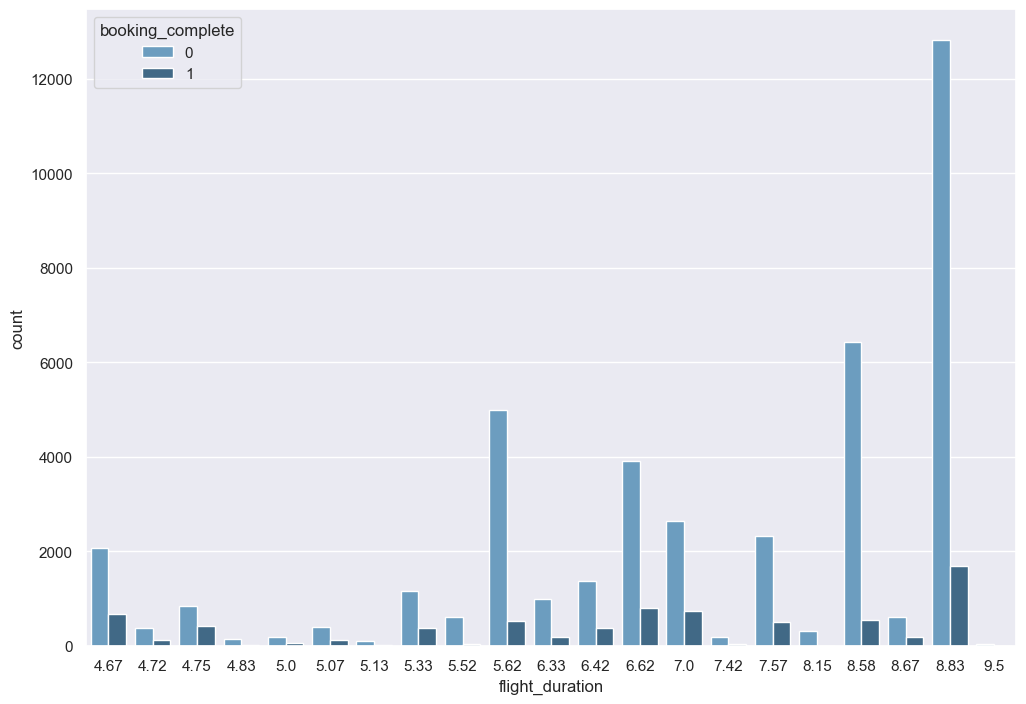

In [82]:
sns.countplot(df_cust['flight_duration'], hue=df_cust['booking_complete'], palette = 'Blues_d')
sns.set(rc={'figure.figsize':(12,12)}) # width, height

<AxesSubplot:xlabel='flight_duration', ylabel='Density'>

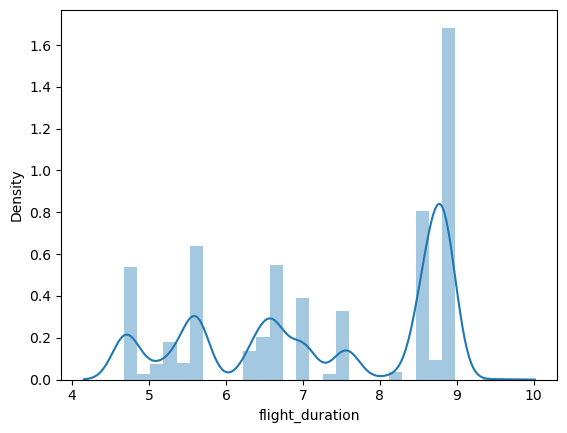

In [32]:
sns.distplot(df_cust['flight_duration'])

In [33]:
df_cust['flight_duration'].mean()

7.277560799998812

- flight duration paling banyak terjadi selama 8 jam lebih 
- the mean of the flight duration is 7,3 jam
- banyak yang melakukan durasi penerbangan lebih dari 8 jam yang pesanannya belum terkonfirmasi
- jika dilihat dari distribusinya, flight duration memiliki left skewed

#### purchase lead

<AxesSubplot:xlabel='purchase_lead', ylabel='Density'>

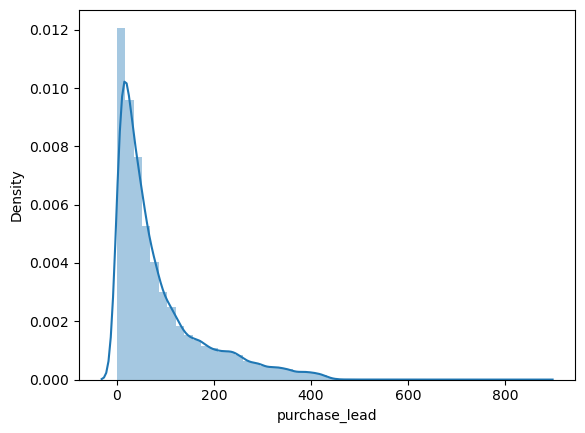

In [34]:
sns.distplot(df_cust['purchase_lead'])

- purchase lead memiliki right skew yang mana bisa jadi terdapat adanya outlier

#### flight hour

<AxesSubplot:xlabel='flight_hour', ylabel='Density'>

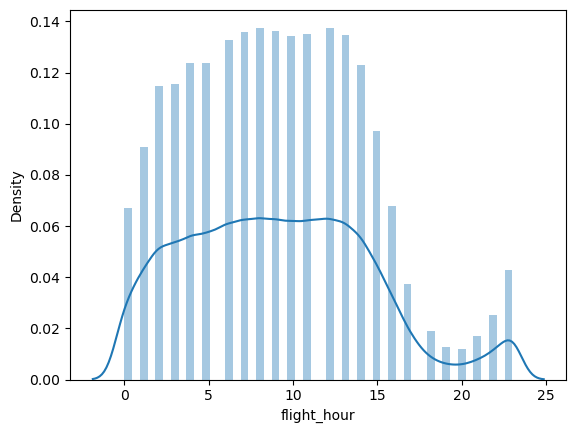

In [35]:
sns.distplot(df_cust['flight_hour'])

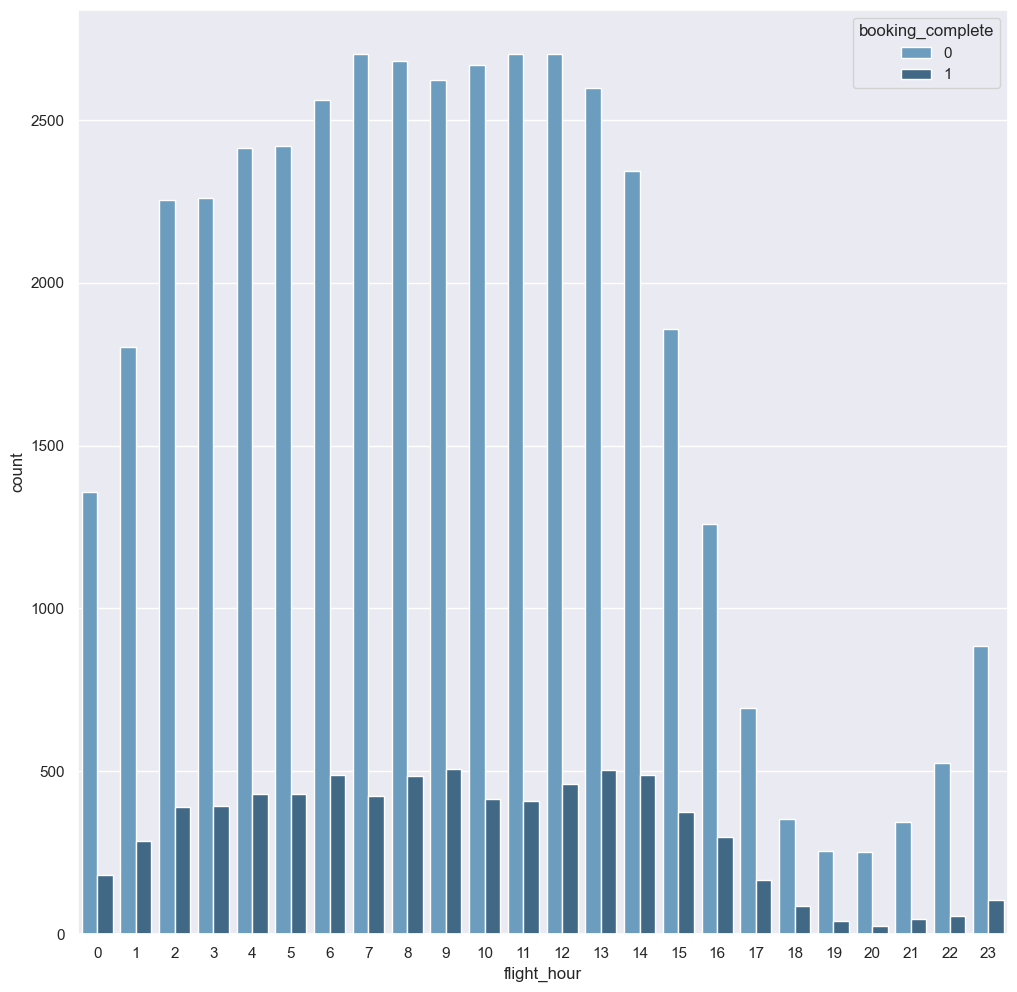

In [85]:
sns.countplot(df_cust['flight_hour'], hue=df_cust['booking_complete'], palette = 'Blues_d')
sns.set(rc={'figure.figsize':(12,12)}) # width, height

- flight_hour rata-rata sekitar 15 jam
- terdapat skewed yang mana ada indikasi jika terdapat outlier

### booking complete

<AxesSubplot:xlabel='booking_complete', ylabel='Density'>

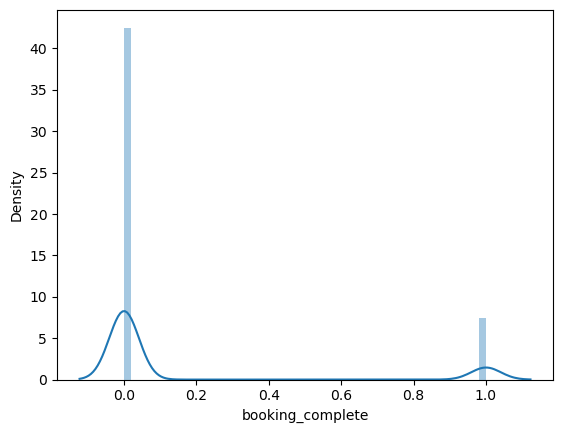

In [36]:
sns.distplot(df_cust['booking_complete'])

- if we see at this distribution, mostly customer still not complete the booking

<AxesSubplot:xlabel='length_of_stay', ylabel='Density'>

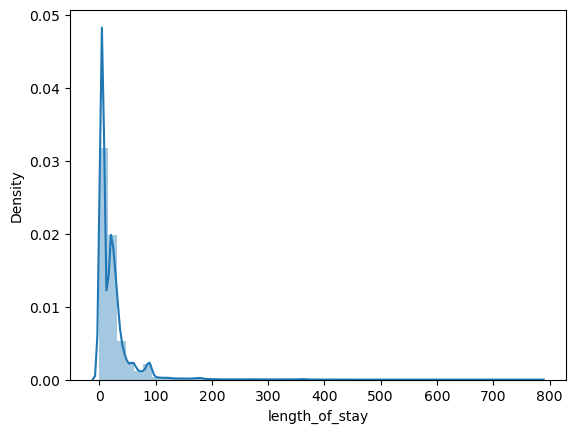

In [37]:
sns.distplot(df_cust['length_of_stay'])

- di bag.lengt if stay terdapat right skew yang mana menjadi ssuatu indikasi adanya outlier 

<AxesSubplot:xlabel='wants_extra_baggage', ylabel='Density'>

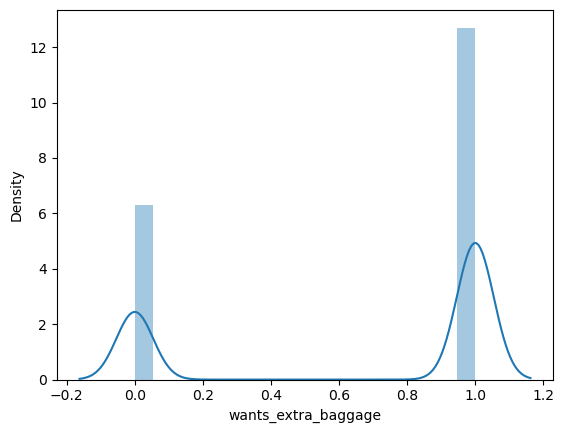

In [38]:
sns.distplot(df_cust['wants_extra_baggage'])

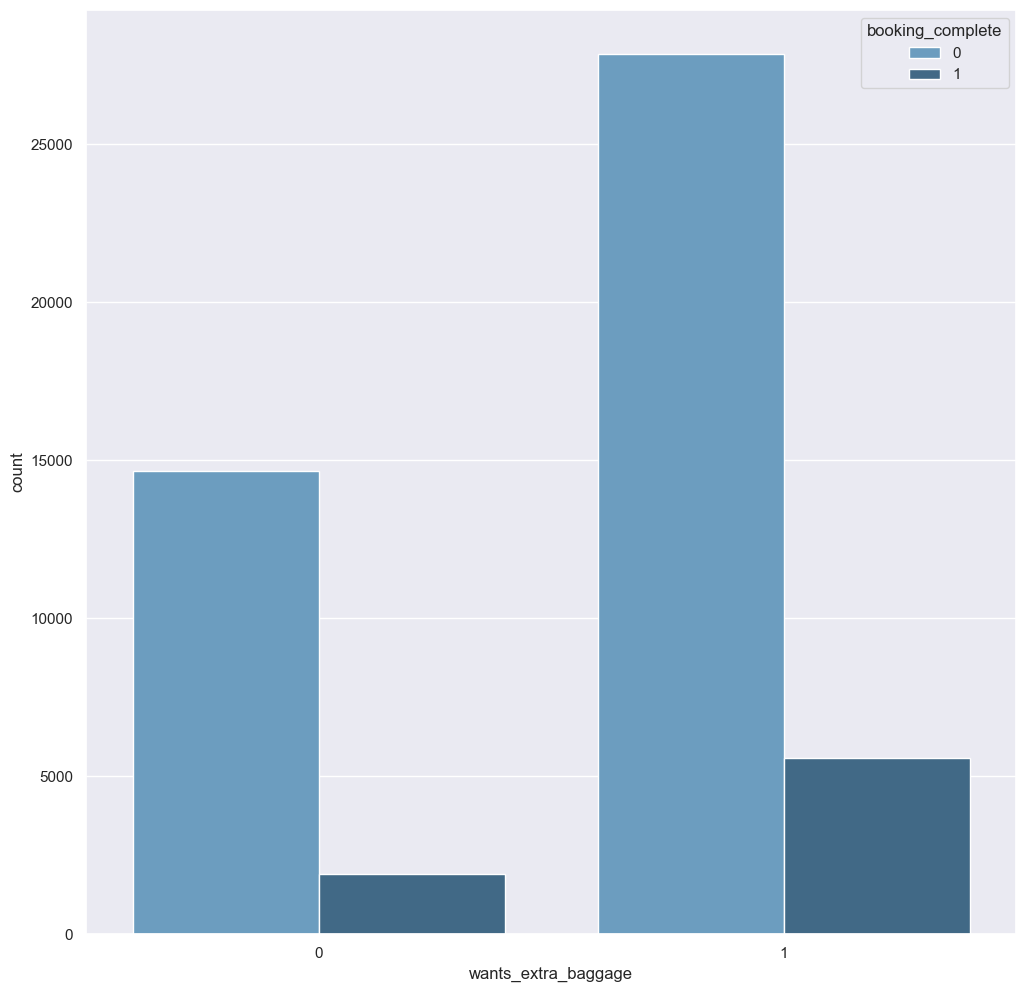

In [88]:
sns.countplot(df_cust['wants_extra_baggage'], hue=df_cust['booking_complete'], palette = 'Blues_d')
sns.set(rc={'figure.figsize':(12,12)}) # width, height

- mostly customer want ekstra bagasi
- dan mostly dari customer yang meminta bagasi lebih belom melakukan booking secara complete

<AxesSubplot:xlabel='wants_preferred_seat', ylabel='Density'>

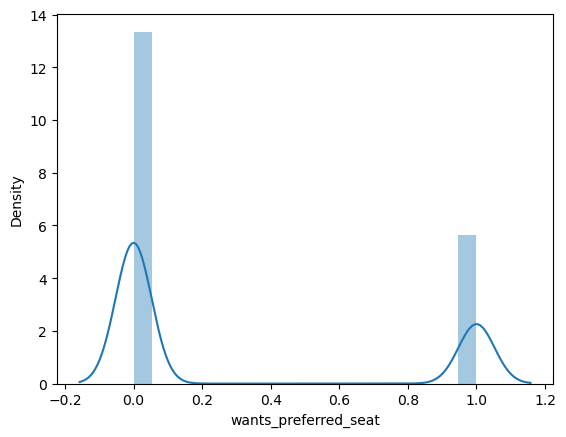

In [39]:
sns.distplot(df_cust['wants_preferred_seat'])

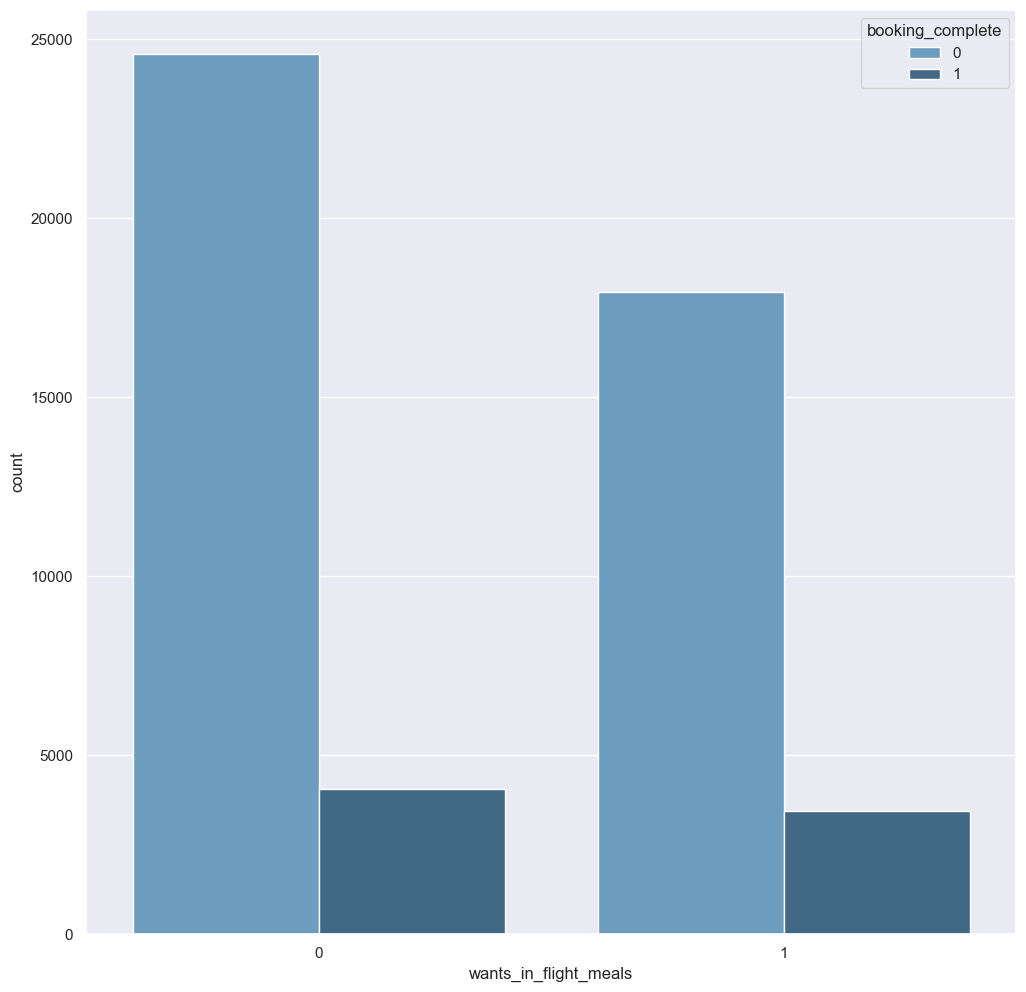

In [89]:
sns.countplot(df_cust['wants_in_flight_meals'], hue=df_cust['booking_complete'], palette = 'Blues_d')
sns.set(rc={'figure.figsize':(12,12)}) # width, height

<AxesSubplot:xlabel='wants_in_flight_meals', ylabel='Density'>

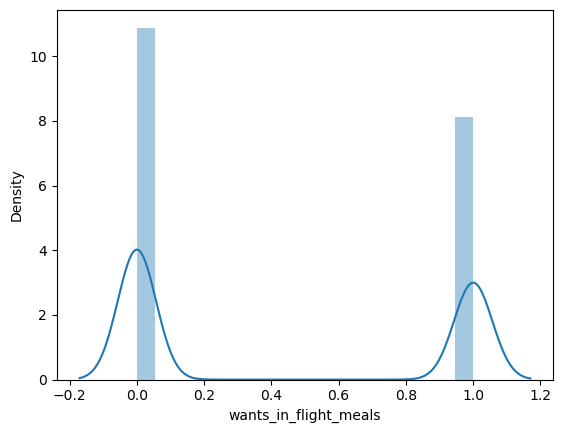

In [40]:
sns.distplot(df_cust['wants_in_flight_meals'])

- mostly customer tidak ingin makanan penerbangan
- mostly juga masih belum melakukan booking secara complete

In [42]:
#check the columns
df_cust.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

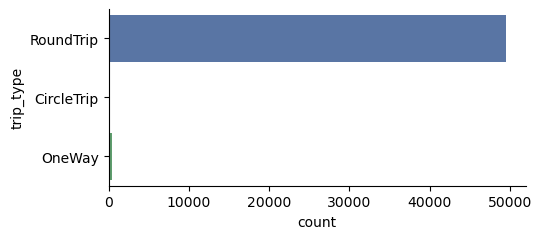

In [43]:
sns.catplot(y='trip_type', kind='count', data=df_cust, height=2.5, aspect=2.2, palette = 'deep')

<AxesSubplot:xlabel='trip_type', ylabel='count'>

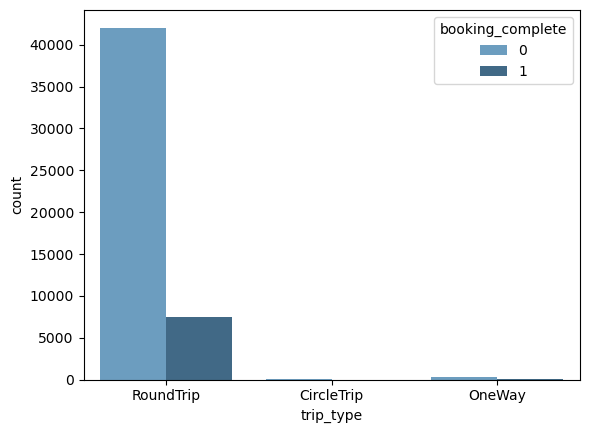

In [44]:
sns.countplot(df_cust['trip_type'], hue=df_cust['booking_complete'], palette = 'Blues_d')

In [45]:
df_cust['trip_type'].value_counts()

RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

In [46]:
#percentage trip_type rate
cr = df_cust.trip_type.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
cr

RoundTrip     99.0%
OneWay         0.8%
CircleTrip     0.2%
Name: trip_type, dtype: object

The summary about the Trip Type  with booking Complete
- Mostly the customer do the Trip Type Round Trip
- the customer who choose the one way trip just have 0,8 % from the wholes
- The customer who choose the circle trip just 0.2%
- the customer in the trip type round trip, have the complete booking is more than 5000 and the customer round trip who have not complete booking more than 40000
- and the oneway trip custemer mostly not complete booking

In [47]:
df_cust['flight_day'].value_counts()

Mon    8102
Wed    7674
Tue    7673
Thu    7424
Fri    6761
Sun    6554
Sat    5812
Name: flight_day, dtype: int64

In [48]:
#percentage trip_type rate
cf = df_cust.flight_day.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
cf

Mon    16.2%
Wed    15.3%
Tue    15.3%
Thu    14.8%
Fri    13.5%
Sun    13.1%
Sat    11.6%
Name: flight_day, dtype: object

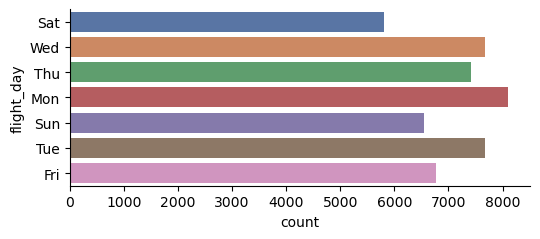

In [49]:
sns.catplot(y='flight_day', kind='count', data=df_cust, height=2.5, aspect=2.2, palette = 'deep')

<AxesSubplot:xlabel='flight_day', ylabel='count'>

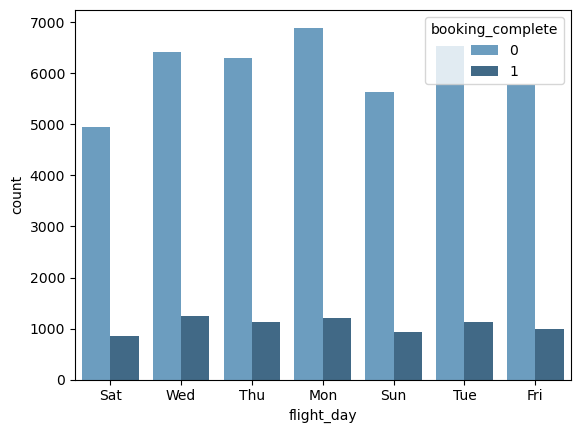

In [50]:
sns.countplot(df_cust['flight_day'], hue=df_cust['booking_complete'], palette = 'Blues_d')

the summary about the flight days
- hari penerbangan terbanyak di hari senin, selasa dan kamis
- hari penerbangan yang longgar terdapat di hari sabtu
- rata-rata di semua hari di dominasi dengan not complete booking 

In [51]:
#percentage trip_type rate
preroute= df_cust.route.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
preroute

AKLKUL    5.4%
PENTPE    1.8%
MELSGN    1.7%
ICNSIN    1.6%
DMKKIX    1.5%
          ... 
LBUTPE    0.0%
CXRMEL    0.0%
DELKBR    0.0%
KOSSYD    0.0%
MRUXIY    0.0%
Name: route, Length: 799, dtype: object

In [52]:
df_cust['route'].value_counts()

AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: route, Length: 799, dtype: int64

- route penerbangan = 
AKL - KUL
PEN - TPE
MEL - SGN
ICN - SIN
DMK - KIX

- future plan > change with other option except the 5 first


In [53]:
#percentage trip_type rate
pre_bo= df_cust.booking_origin.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pre_bo

Australia               35.7%
Malaysia                14.3%
South Korea              9.1%
Japan                    7.8%
China                    6.8%
                        ...  
Panama                   0.0%
Tonga                    0.0%
Tanzania                 0.0%
Bulgaria                 0.0%
Svalbard & Jan Mayen     0.0%
Name: booking_origin, Length: 104, dtype: object

In [54]:
df_cust['booking_origin'].value_counts()

Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64

- booking origin terbanyak terdapat di Australia, Malaysia, South Korea, Japan dan China
- future plan > nati yang lain di ganti other opt

<AxesSubplot:xlabel='sales_channel', ylabel='count'>

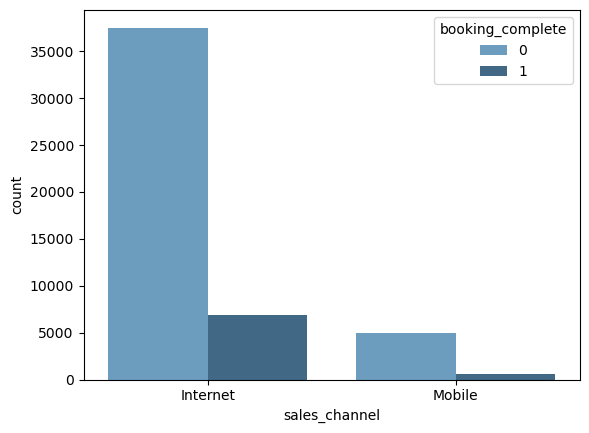

In [55]:
sns.countplot(df_cust['sales_channel'], hue=df_cust['booking_complete'], palette = 'Blues_d')

In [56]:
#percentage trip_type rate
prec= df_cust.sales_channel.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
prec

Internet    88.8%
Mobile      11.2%
Name: sales_channel, dtype: object

- 88.8%  customers order with internet with not complete booking
- 11.2 % customer mengorder lewat mobile dan juga sama-sama didominasi dengan not complete booking

**The target is booking_complete**

In [57]:
df_cust.head(3)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0


In [58]:
df_cust.sort_values(by=['route', 'booking_complete'], 
                    ascending=[False, True]).head(50) #mengurutkan lebih dari 1 kolom

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
42242,2,Internet,RoundTrip,27,5,3,Sat,URTXIY,China,1,0,0,5.00,0
25593,2,Internet,RoundTrip,22,30,7,Fri,TWUXIY,China,1,1,0,5.00,0
25594,1,Internet,RoundTrip,20,28,16,Thu,TWUXIY,China,1,0,0,5.00,0
25595,1,Internet,RoundTrip,28,26,9,Wed,TWUXIY,Malaysia,1,0,1,5.00,0
34956,2,Internet,RoundTrip,175,4,13,Mon,TWUXIY,China,0,0,0,5.00,0
42241,2,Internet,RoundTrip,29,5,9,Thu,TWUXIY,China,0,0,0,5.00,0
25596,1,Internet,RoundTrip,34,60,5,Tue,TWUXIY,Malaysia,0,0,0,5.00,1
42240,2,Internet,RoundTrip,33,5,2,Sun,TWUXIY,China,1,1,1,5.00,1
34955,2,Internet,RoundTrip,44,4,8,Sat,TWUWUH,China,1,0,0,5.13,0
42239,2,Internet,RoundTrip,17,5,10,Wed,TWUWUH,China,1,0,0,5.13,1


In [59]:
sudah = df_cust[df_cust['booking_complete']==1]
sudah.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
82,1,Internet,RoundTrip,15,31,17,Mon,AKLKUL,Malaysia,0,0,0,8.83,1
86,1,Internet,RoundTrip,156,19,14,Mon,AKLKUL,Malaysia,1,0,0,8.83,1
94,1,Internet,RoundTrip,181,87,2,Tue,AKLKUL,Singapore,1,0,1,8.83,1
109,1,Mobile,RoundTrip,127,17,16,Tue,AKLKUL,Malaysia,1,0,1,8.83,1
122,1,Internet,RoundTrip,42,17,14,Tue,AKLKUL,Malaysia,0,0,0,8.83,1


In [60]:
sudah.shape

(7478, 14)

In [61]:
belom = df_cust[df_cust['booking_complete']==0]
belom.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [62]:
belom.shape

(42522, 14)

In [63]:
bc= df_cust.booking_complete.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
bc

0    85.0%
1    15.0%
Name: booking_complete, dtype: object

- terdapat 85% customer not booking complete
- dan sisanya booking complete